In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import linalg
from sklearn.manifold import TSNE 
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
import scipy.fft as fft
from sklearn.pipeline import Pipeline
from pprint import pprint

In [2]:
data = pd.read_csv("../Data/center_sternum.txt", sep='\t')[14:].reset_index(drop=True)
data = data.drop(columns=["Log Mode","Log Freq", "Timestamp"])
data.head()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,MagnX,MagnY,MagnZ,qw,qi,qj,qk
0,1004.426,460.916,-49.898,30.10687,-4.839694,-8.412213,-455,-496,-166,0.690816,0.313364,-0.651540,0.008515
1,1010.648,432.673,-20.496,28.87023,-1.832061,-7.862596,-454,-498,-162,0.687576,0.314707,-0.654286,0.010437
2,1030.717,427.854,-20.679,27.72519,0.503817,-5.221374,-454,-498,-162,0.686239,0.314829,-0.655599,0.012238
3,1047.492,415.410,-47.641,26.00000,6.091603,-0.687023,-455,-499,-161,0.683960,0.314341,-0.658132,0.015870
4,1040.050,411.872,-28.792,24.87023,9.236641,3.404580,-455,-499,-161,0.683071,0.313639,-0.659322,0.018433


In [3]:
## Pre-processing data: scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [4]:
## Instantiating PCA and kernelPCA
pca = PCA()

## Computing PCA
pca_data = pca.fit_transform(scaled_data)

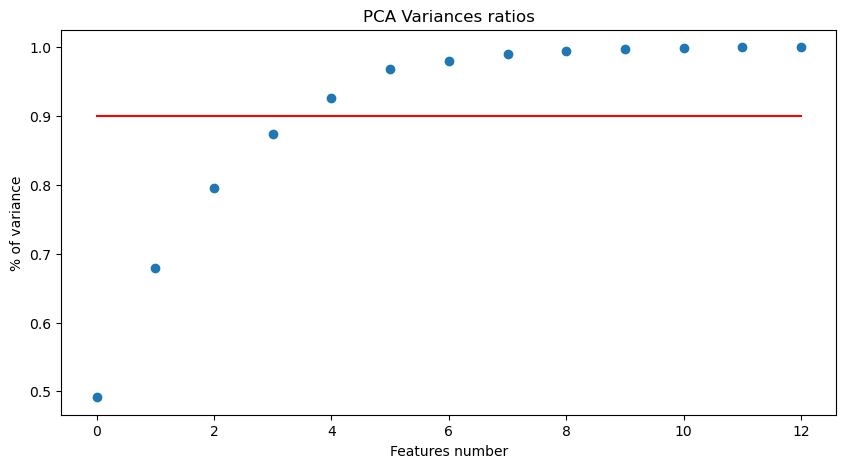

In [7]:
# Analyzing the result of PCA
fig, ax1 = plt.subplots(1,1,figsize = (10,5))
ax1.scatter(np.arange(len(pca.explained_variance_ratio_)),np.cumsum(pca.explained_variance_ratio_))
ax1.set_title("PCA Variances ratios")
ax1.set_ylabel("% of variance")
ax1.set_xlabel("Features number")
ax1.plot(np.arange(len(pca.explained_variance_ratio_)),np.ones(len(pca.explained_variance_ratio_))*0.9,color="red")

In [13]:
# PCA tell use that 4 components are enough to describe the data. Let's try using kernelPCA with 4 components
kpca = KernelPCA(n_components=4,kernel="sigmoid")
kpca_data = kpca.fit_transform(scaled_data)

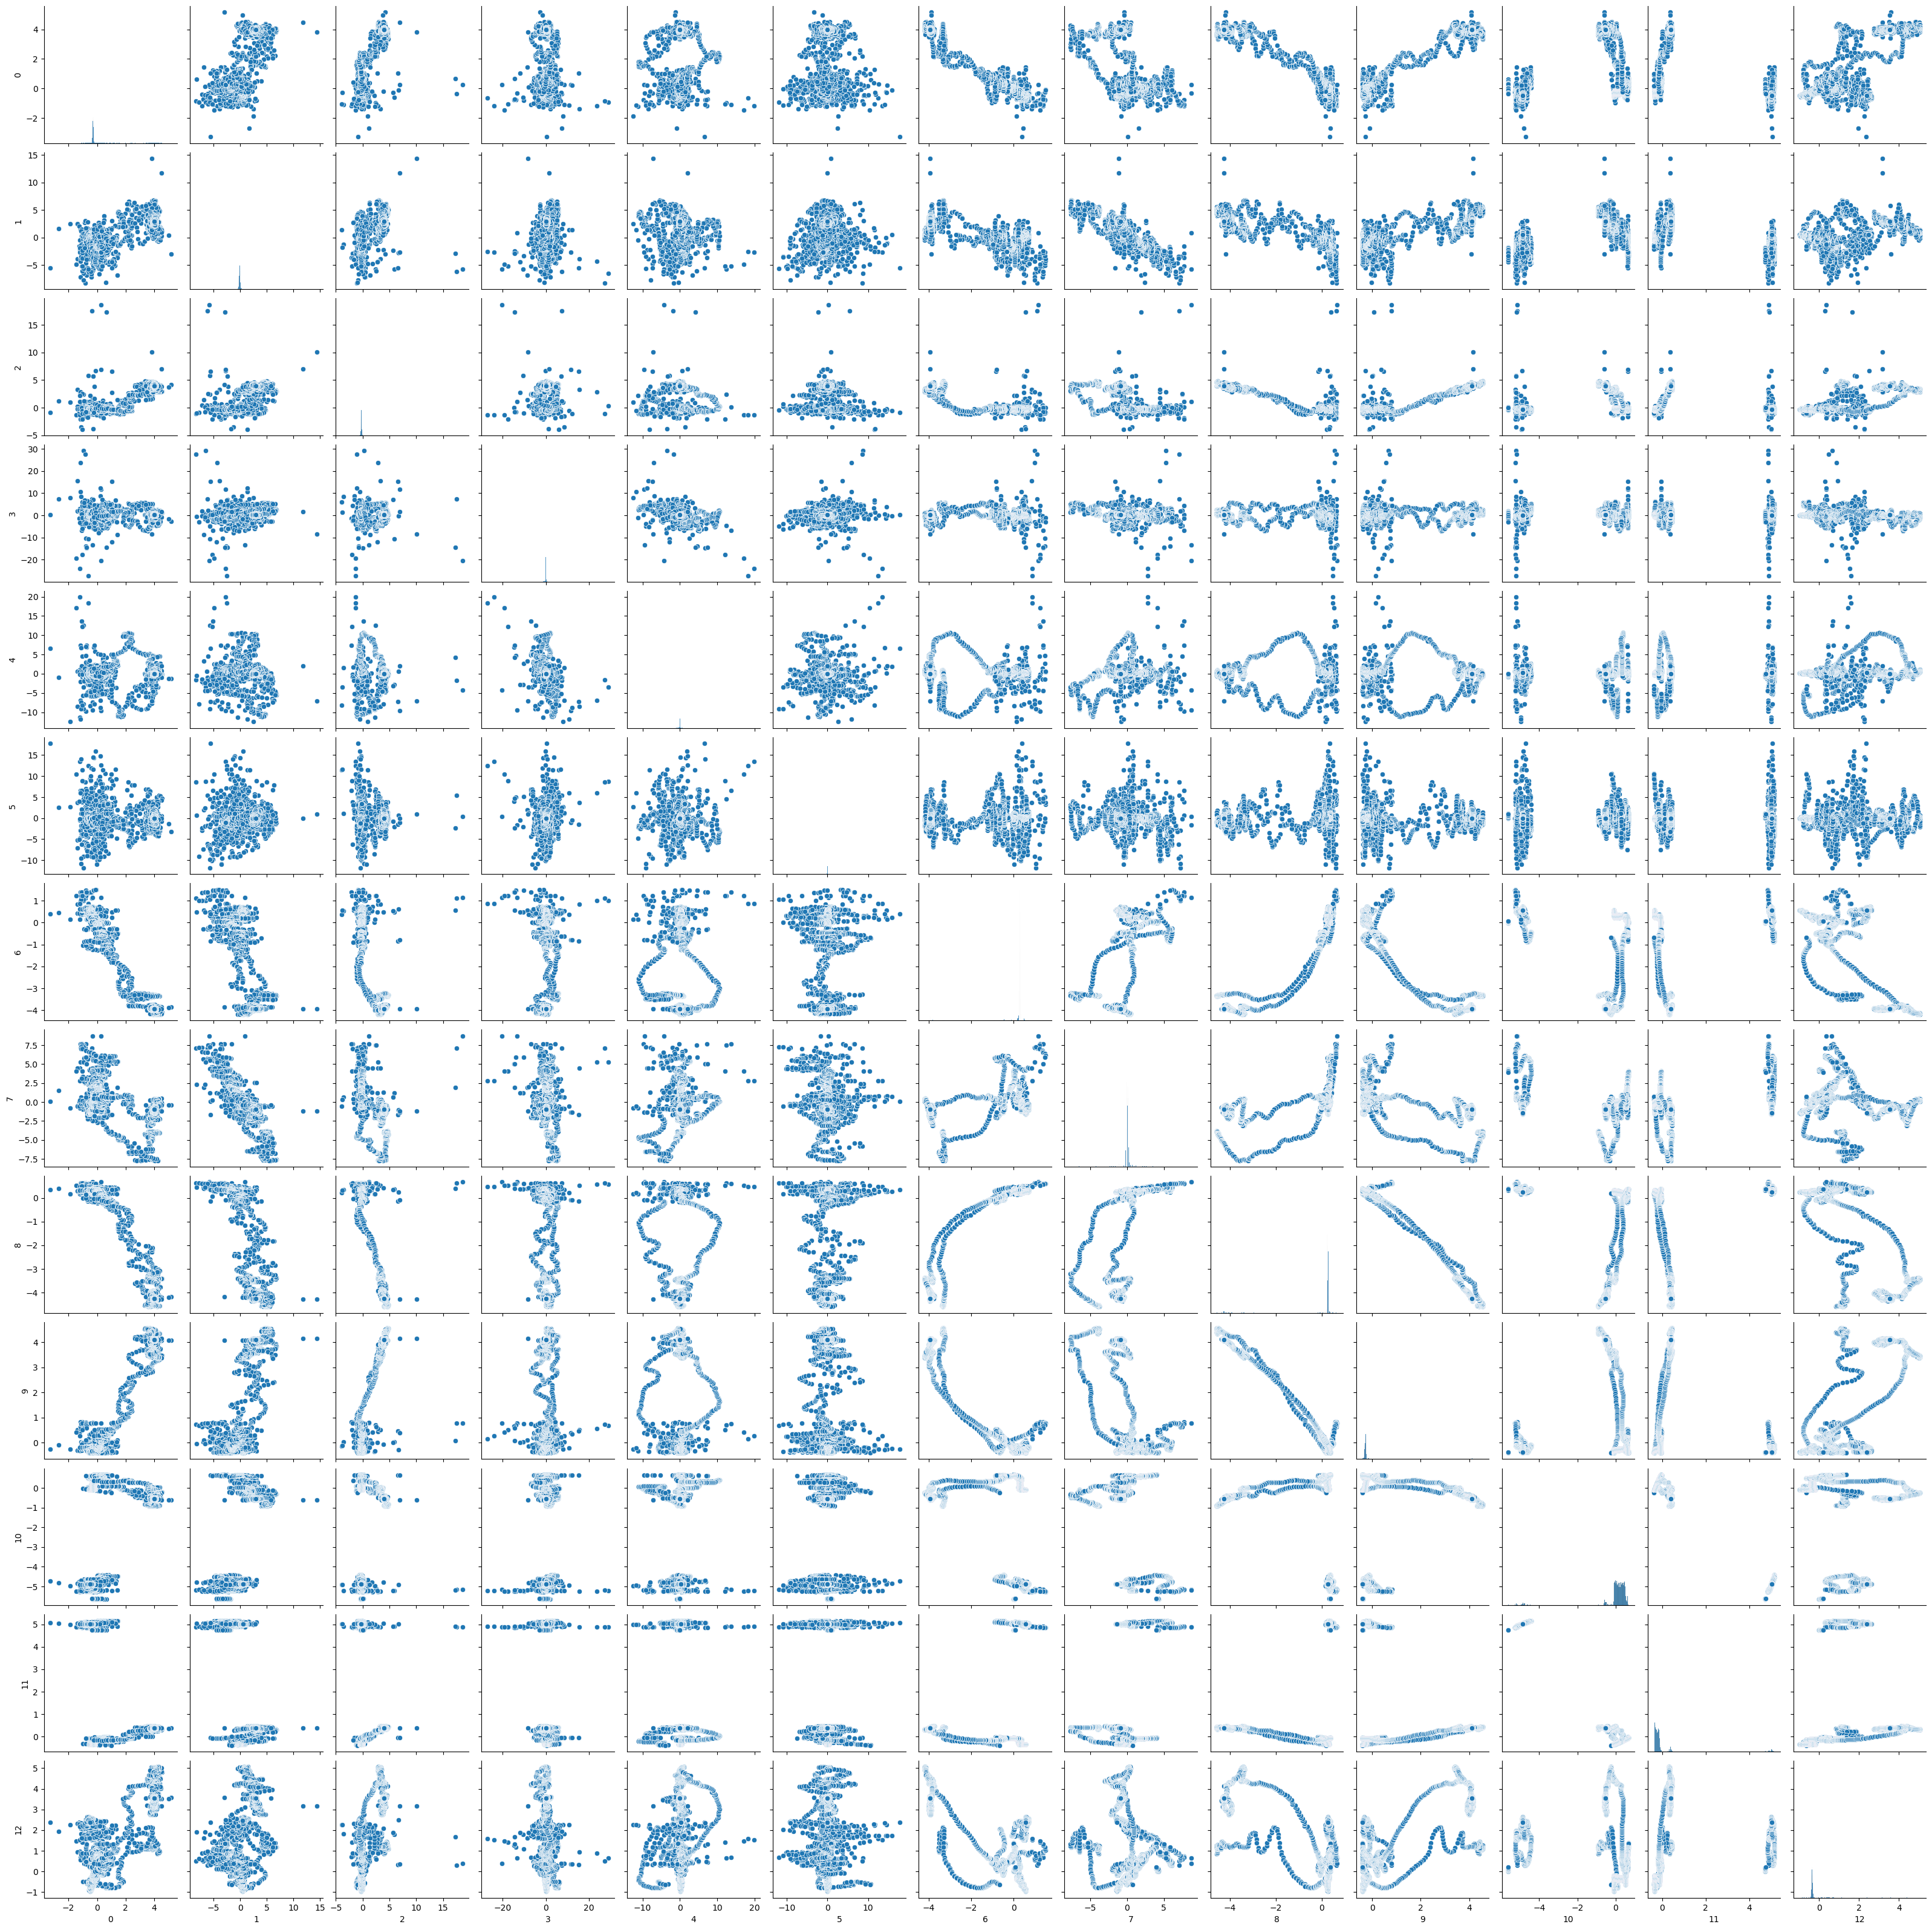

In [16]:
sns.pairplot(pd.DataFrame(scaled_data))

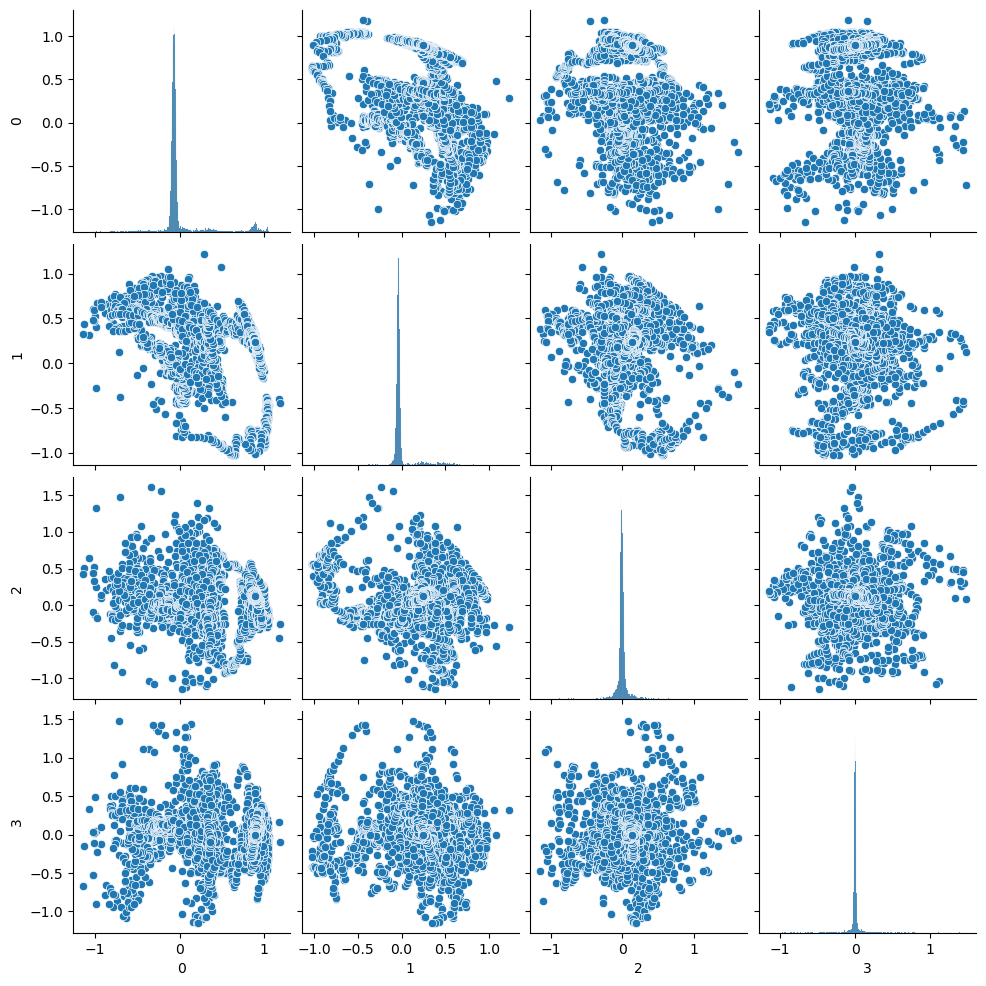

In [14]:
sns.pairplot(pd.DataFrame(kpca_data))